# Analysis of amino acid features

> Extract features from amino acid

## Setup

In [ ]:
# !pip install git+https://github.com/sky1ove/katlas.git -Uqq

In [ ]:
from katlas.core import *
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()
import seaborn as sns

## AA info

In [ ]:
# Download the amino acid info
aa = Data.get_aa_info()

In [ ]:
aa = aa.iloc[:-2,:]

## Morgan

In [ ]:
morgan = get_morgan(aa,'SMILES')

In [ ]:
def get_morgan_2d(morgan,# np.array or dataframe with values
                  method = 'tsne', # choose from tsne or umap
                  complexity = None, 
                  seed= 0):
    "Use TSNE or UMAP with Jaccard as metric to reduce morgan dimension to 2d."
    
    # Convert to numpy array if it is dataframe
    morgan = np.array(morgan)
    
    if method == 'tsne':
        reducer = TSNE(perplexity = complexity if complexity else 30, random_state=seed, metric='jaccard')
    elif method == 'umap':
        reducer = umap.UMAP(n_neighbors= complexity if complexity else 10, random_state = seed, metric = 'jaccard')
    
    embedding = reducer.fit_transform(morgan)
    
    return embedding

In [ ]:
from sklearn.manifold import TSNE
import umap

In [ ]:
tt = get_morgan_2d(morgan, method = 'tsne',complexity=6)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# tt = get_morgan_2d(morgan, complexity=10)
uu = get_morgan_2d(morgan, method = 'umap',complexity=6)
uu = pd.DataFrame(uu)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
from adjustText import adjust_text

In [ ]:
def plot_2d(X: pd.DataFrame, # a dataframe that has first column to be x, and second column to be y
            name_list,
            **kwargs, # arguments for sns.scatterplot
            ):
    "Make 2D plot from a dataframe that has first column to be x, and second column to be y"
    plt.figure(figsize=(7,7))
    x_col, y_col = X.columns
    sns.scatterplot(data = X,x=x_col,y=y_col,alpha=0.7,**kwargs)
    if name_list is not None:
        texts = [plt.text(X[x_col][i], X[y_col][i], name_list[i],fontsize=8) for i in range(len(X))]
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

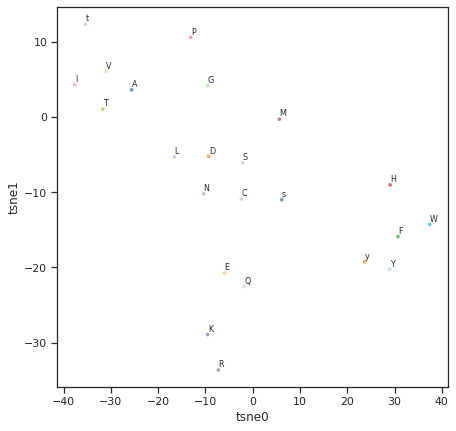

In [ ]:
plot_2d(tt, s=15, 
        hue = aa.Name.tolist(), name_list = aa.index.tolist(), 
        palette='tab20',legend=False)

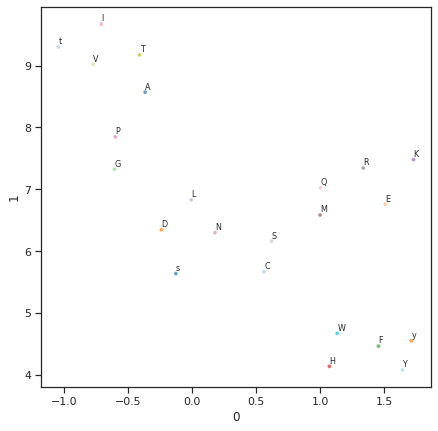

In [ ]:
plot_2d(uu, s=15, 
        hue = aa.Name.tolist(), name_list = aa.index.tolist(), 
        palette='tab20',legend=False)

## Rdkit chemical property

In [ ]:
aa_rdkit = get_rdkit(aa, 'SMILES')

In [ ]:
aa_rdkit.shape

(23, 210)

In [ ]:
aa_rdkit = preprocess(aa_rdkit)

removing columns: {'fr_COO2', 'ExactMolWt', 'fr_ether', 'fr_N_O', 'fr_phenol', 'fr_C_O_noCOO', 'fr_nitrile', 'fr_bicyclic', 'NumRadicalElectrons', 'fr_ketone', 'NumSaturatedCarbocycles', 'fr_amide', 'fr_nitro', 'fr_COO', 'fr_Al_OH_noTert', 'fr_isothiocyan', 'PEOE_VSA13', 'fr_oxazole', 'fr_azo', 'fr_nitro_arom', 'fr_phos_acid', 'SMR_VSA8', 'SlogP_VSA10', 'fr_Nhpyrrole', 'fr_thiophene', 'fr_morpholine', 'fr_piperdine', 'fr_lactone', 'Chi2n', 'fr_aniline', 'fr_furan', 'SMR_VSA2', 'fr_pyridine', 'HeavyAtomMolWt', 'fr_alkyl_carbamate', 'fr_ArN', 'SlogP_VSA6', 'fr_Ar_COO', 'fr_Ar_OH', 'fr_dihydropyridine', 'NumAliphaticCarbocycles', 'fr_epoxide', 'fr_aryl_methyl', 'MaxPartialCharge', 'fr_imide', 'Chi2v', 'fr_diazo', 'fr_ester', 'MinAbsPartialCharge', 'fr_nitroso', 'fr_para_hydroxylation', 'fr_allylic_oxid', 'fr_Ar_NH', 'fr_phos_ester', 'fr_quatN', 'fr_aldehyde', 'fr_sulfone', 'fr_hdrzone', 'fr_Ndealkylation2', 'fr_oxime', 'fr_priamide', 'VSA_EState9', 'fr_hdrzine', 'fr_guanido', 'NumSaturate

In [ ]:
aa_rdkit.shape

(23, 104)

## PCA

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

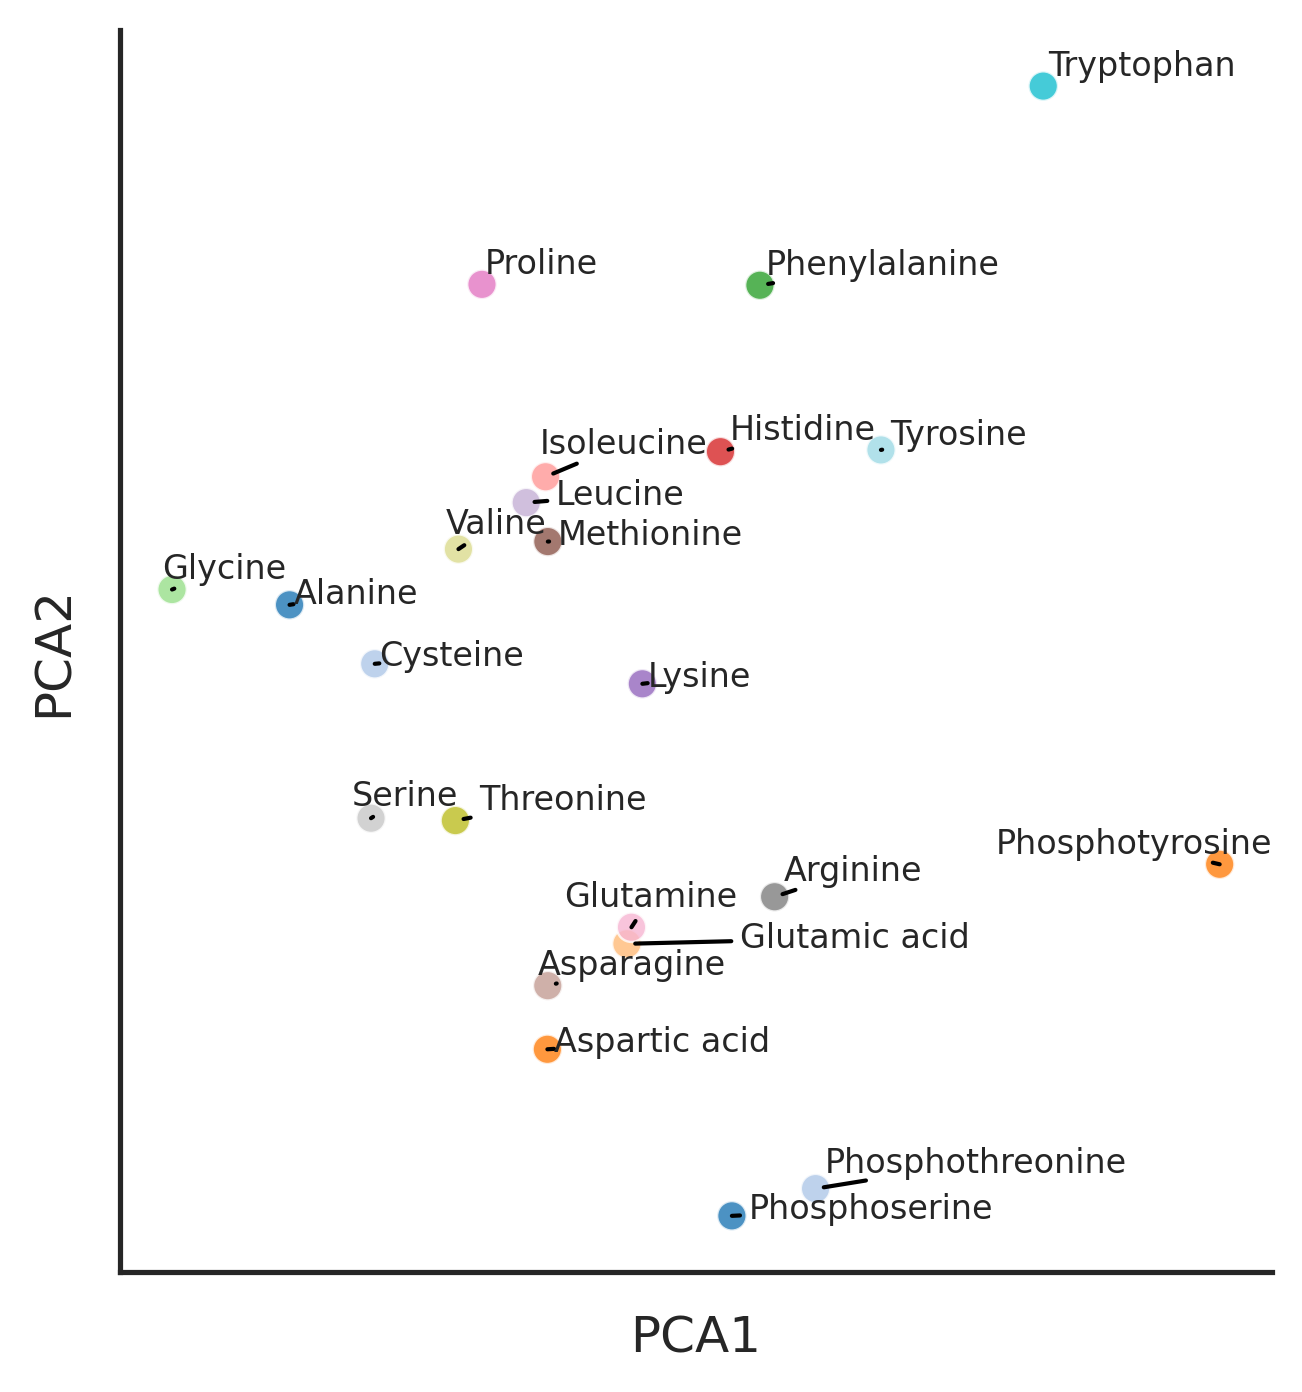

In [ ]:
plot_cluster(aa_rdkit, name_list = aa.Name, hue = 'aa', method = 'pca')

## Correlation of aa

In [ ]:
rdkit_corr = aa_rdkit.T.corr()

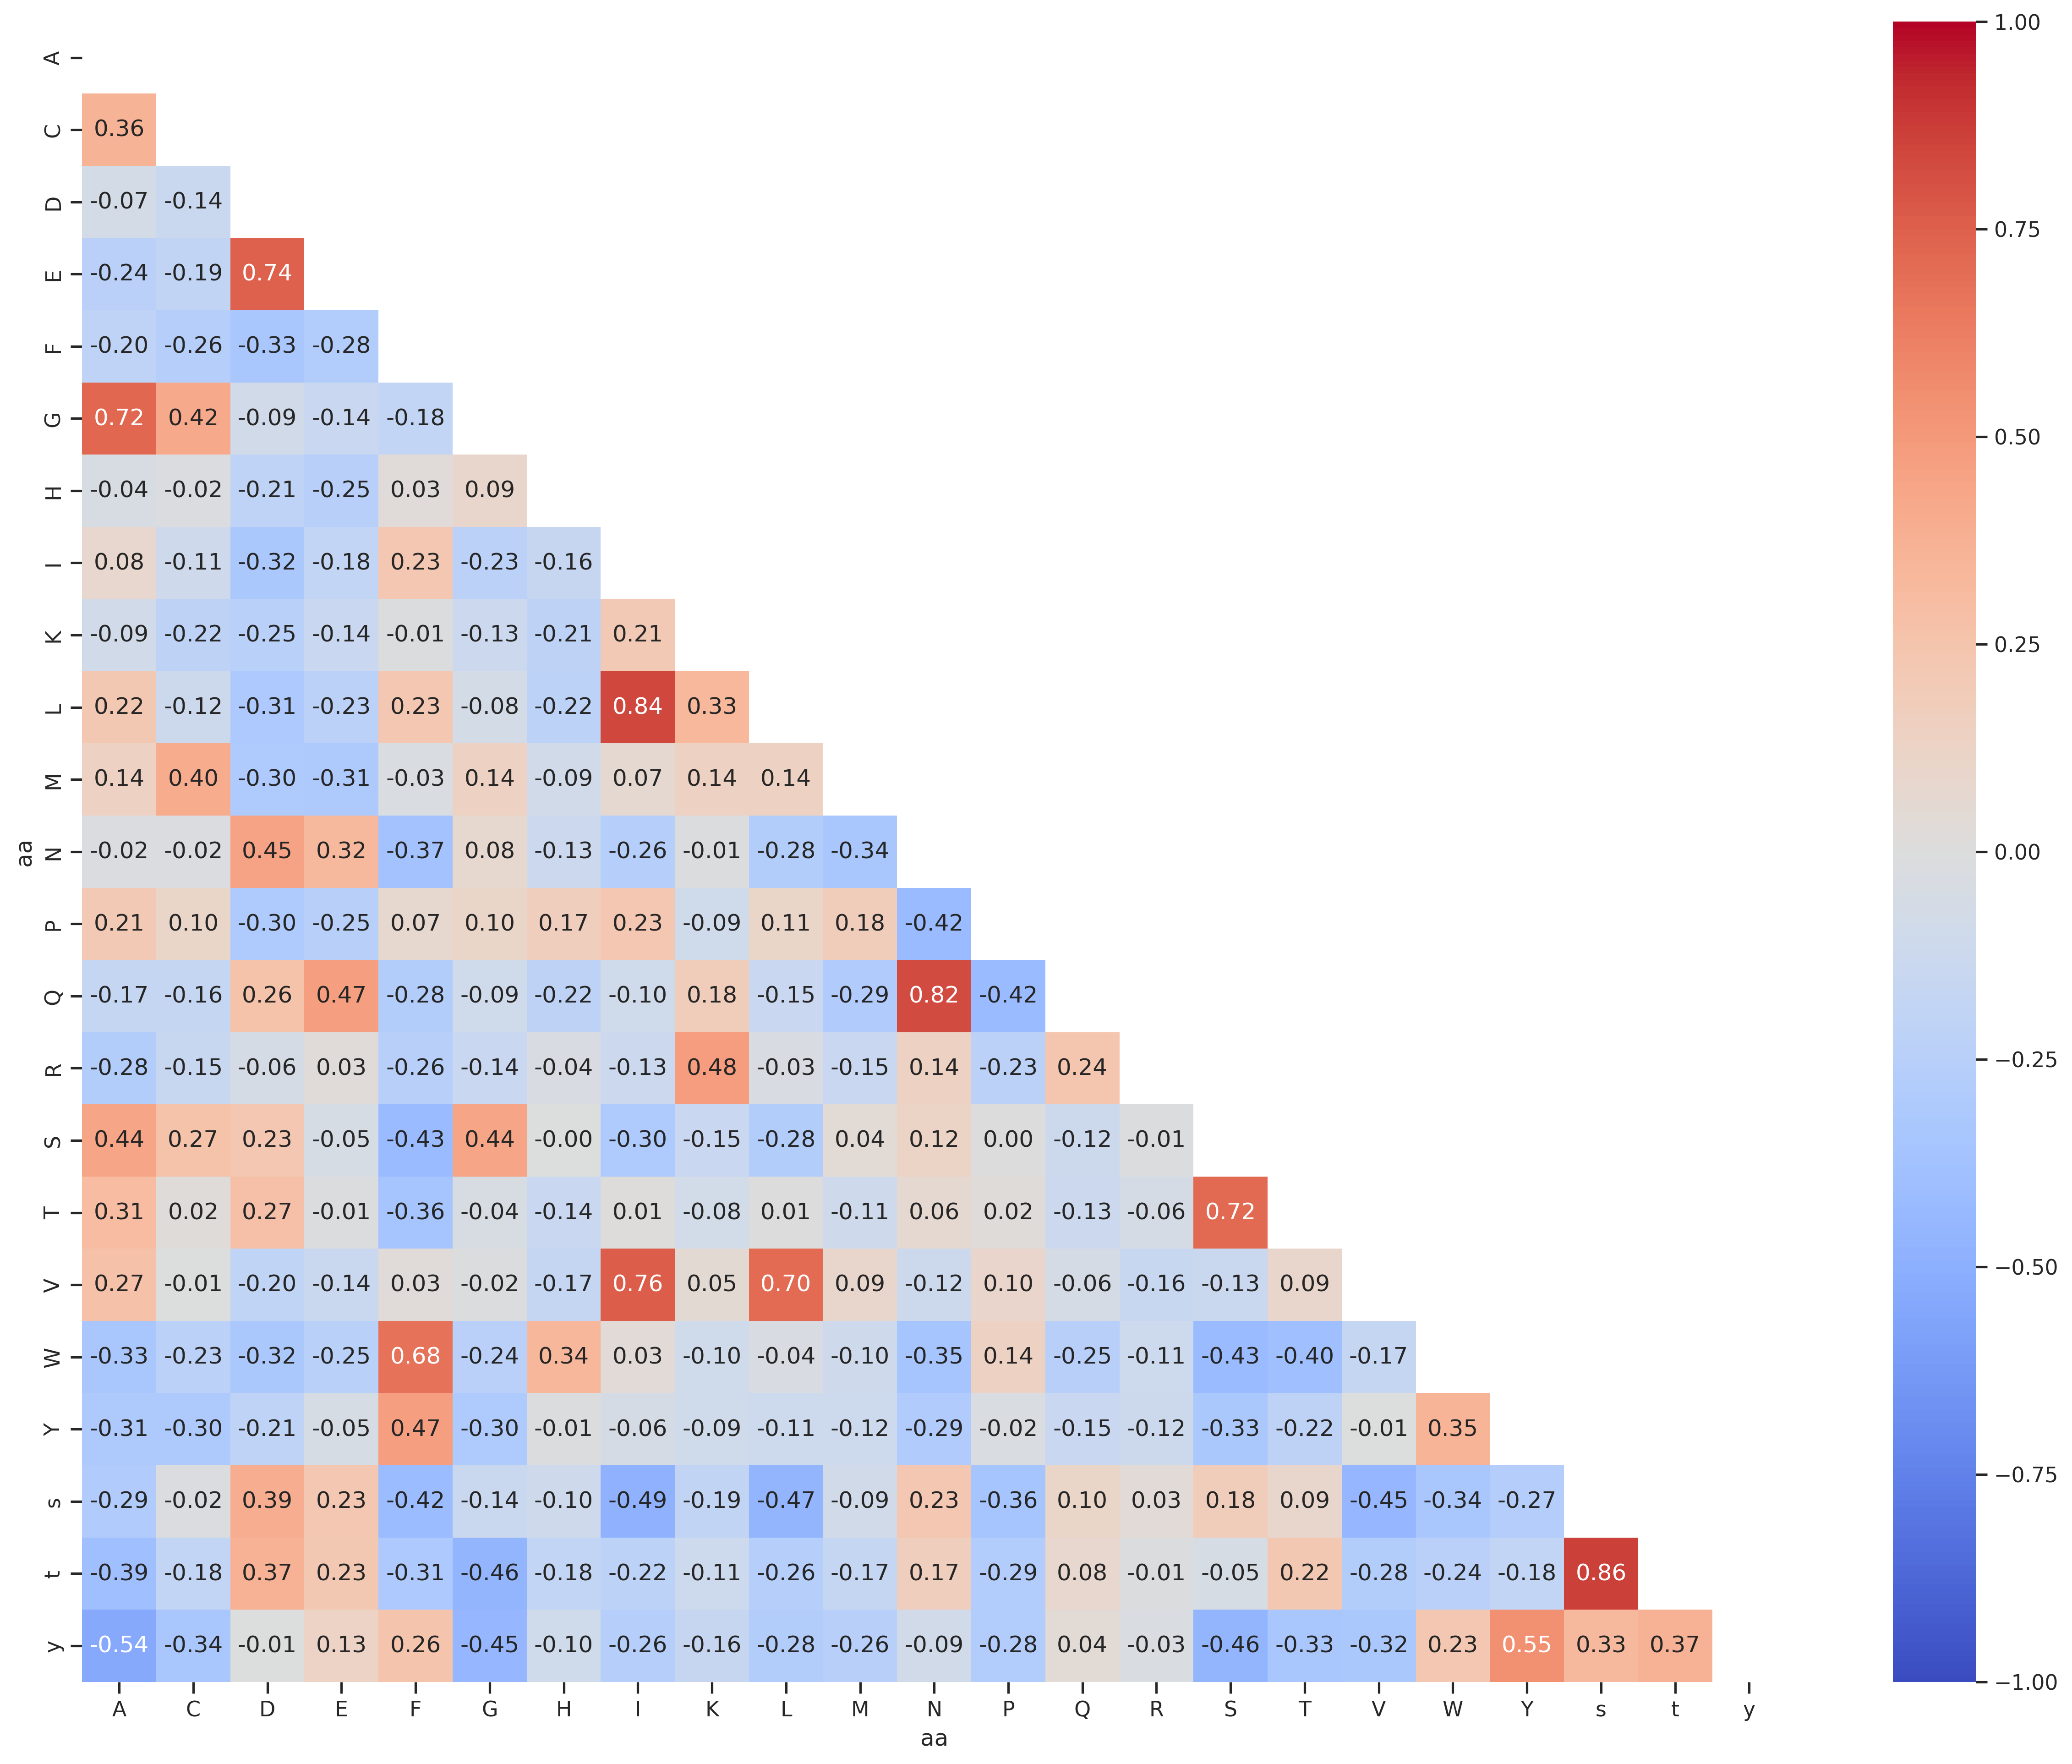

In [ ]:
draw_corr(rdkit_corr)

## Correlation of aa in target

### PSPA - tyr

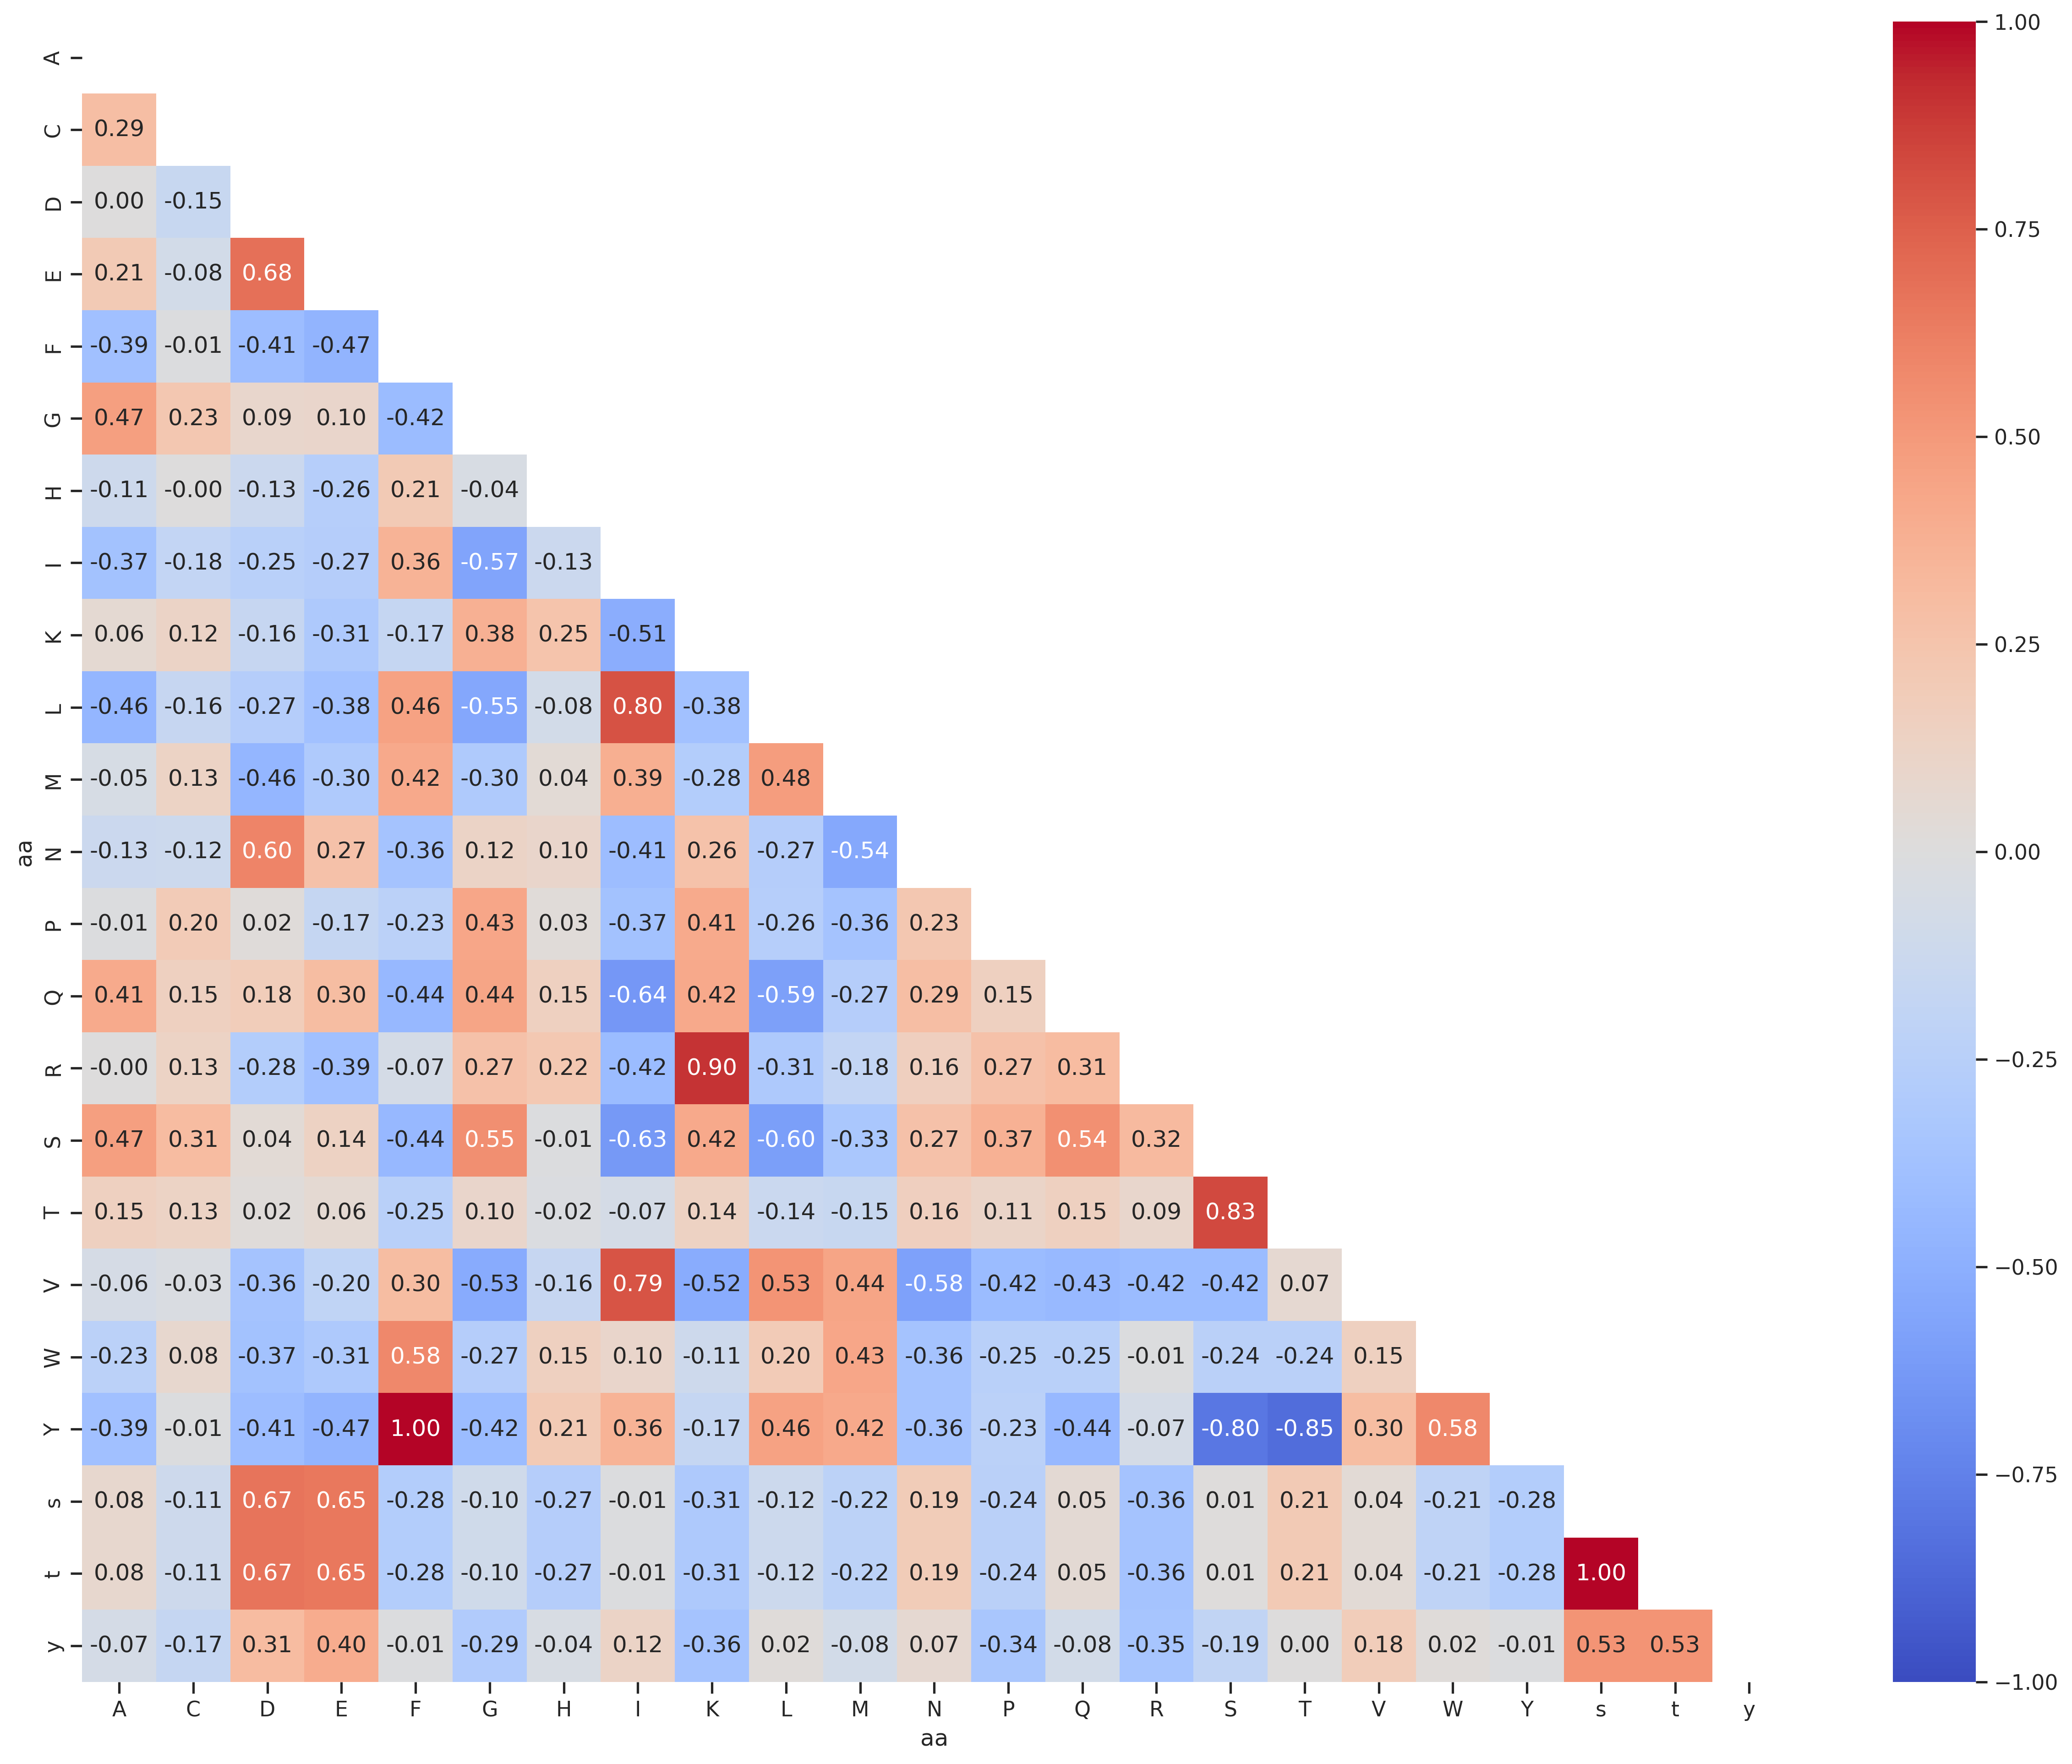

In [ ]:
df = Data.get_pspa_tyr_norm().iloc[:,:-3]

df2 = df.unstack().reset_index()

df2.columns = ['substrate','kinase','target']

df2['aa']=df2.substrate.str[-1]

df2['enum'] = df2.groupby('aa').cumcount()

df_pivot = df2.pivot(index='enum', columns='aa', values='target')

corr = df_pivot.corr().round(2)

draw_corr(corr)

### PSPA - st

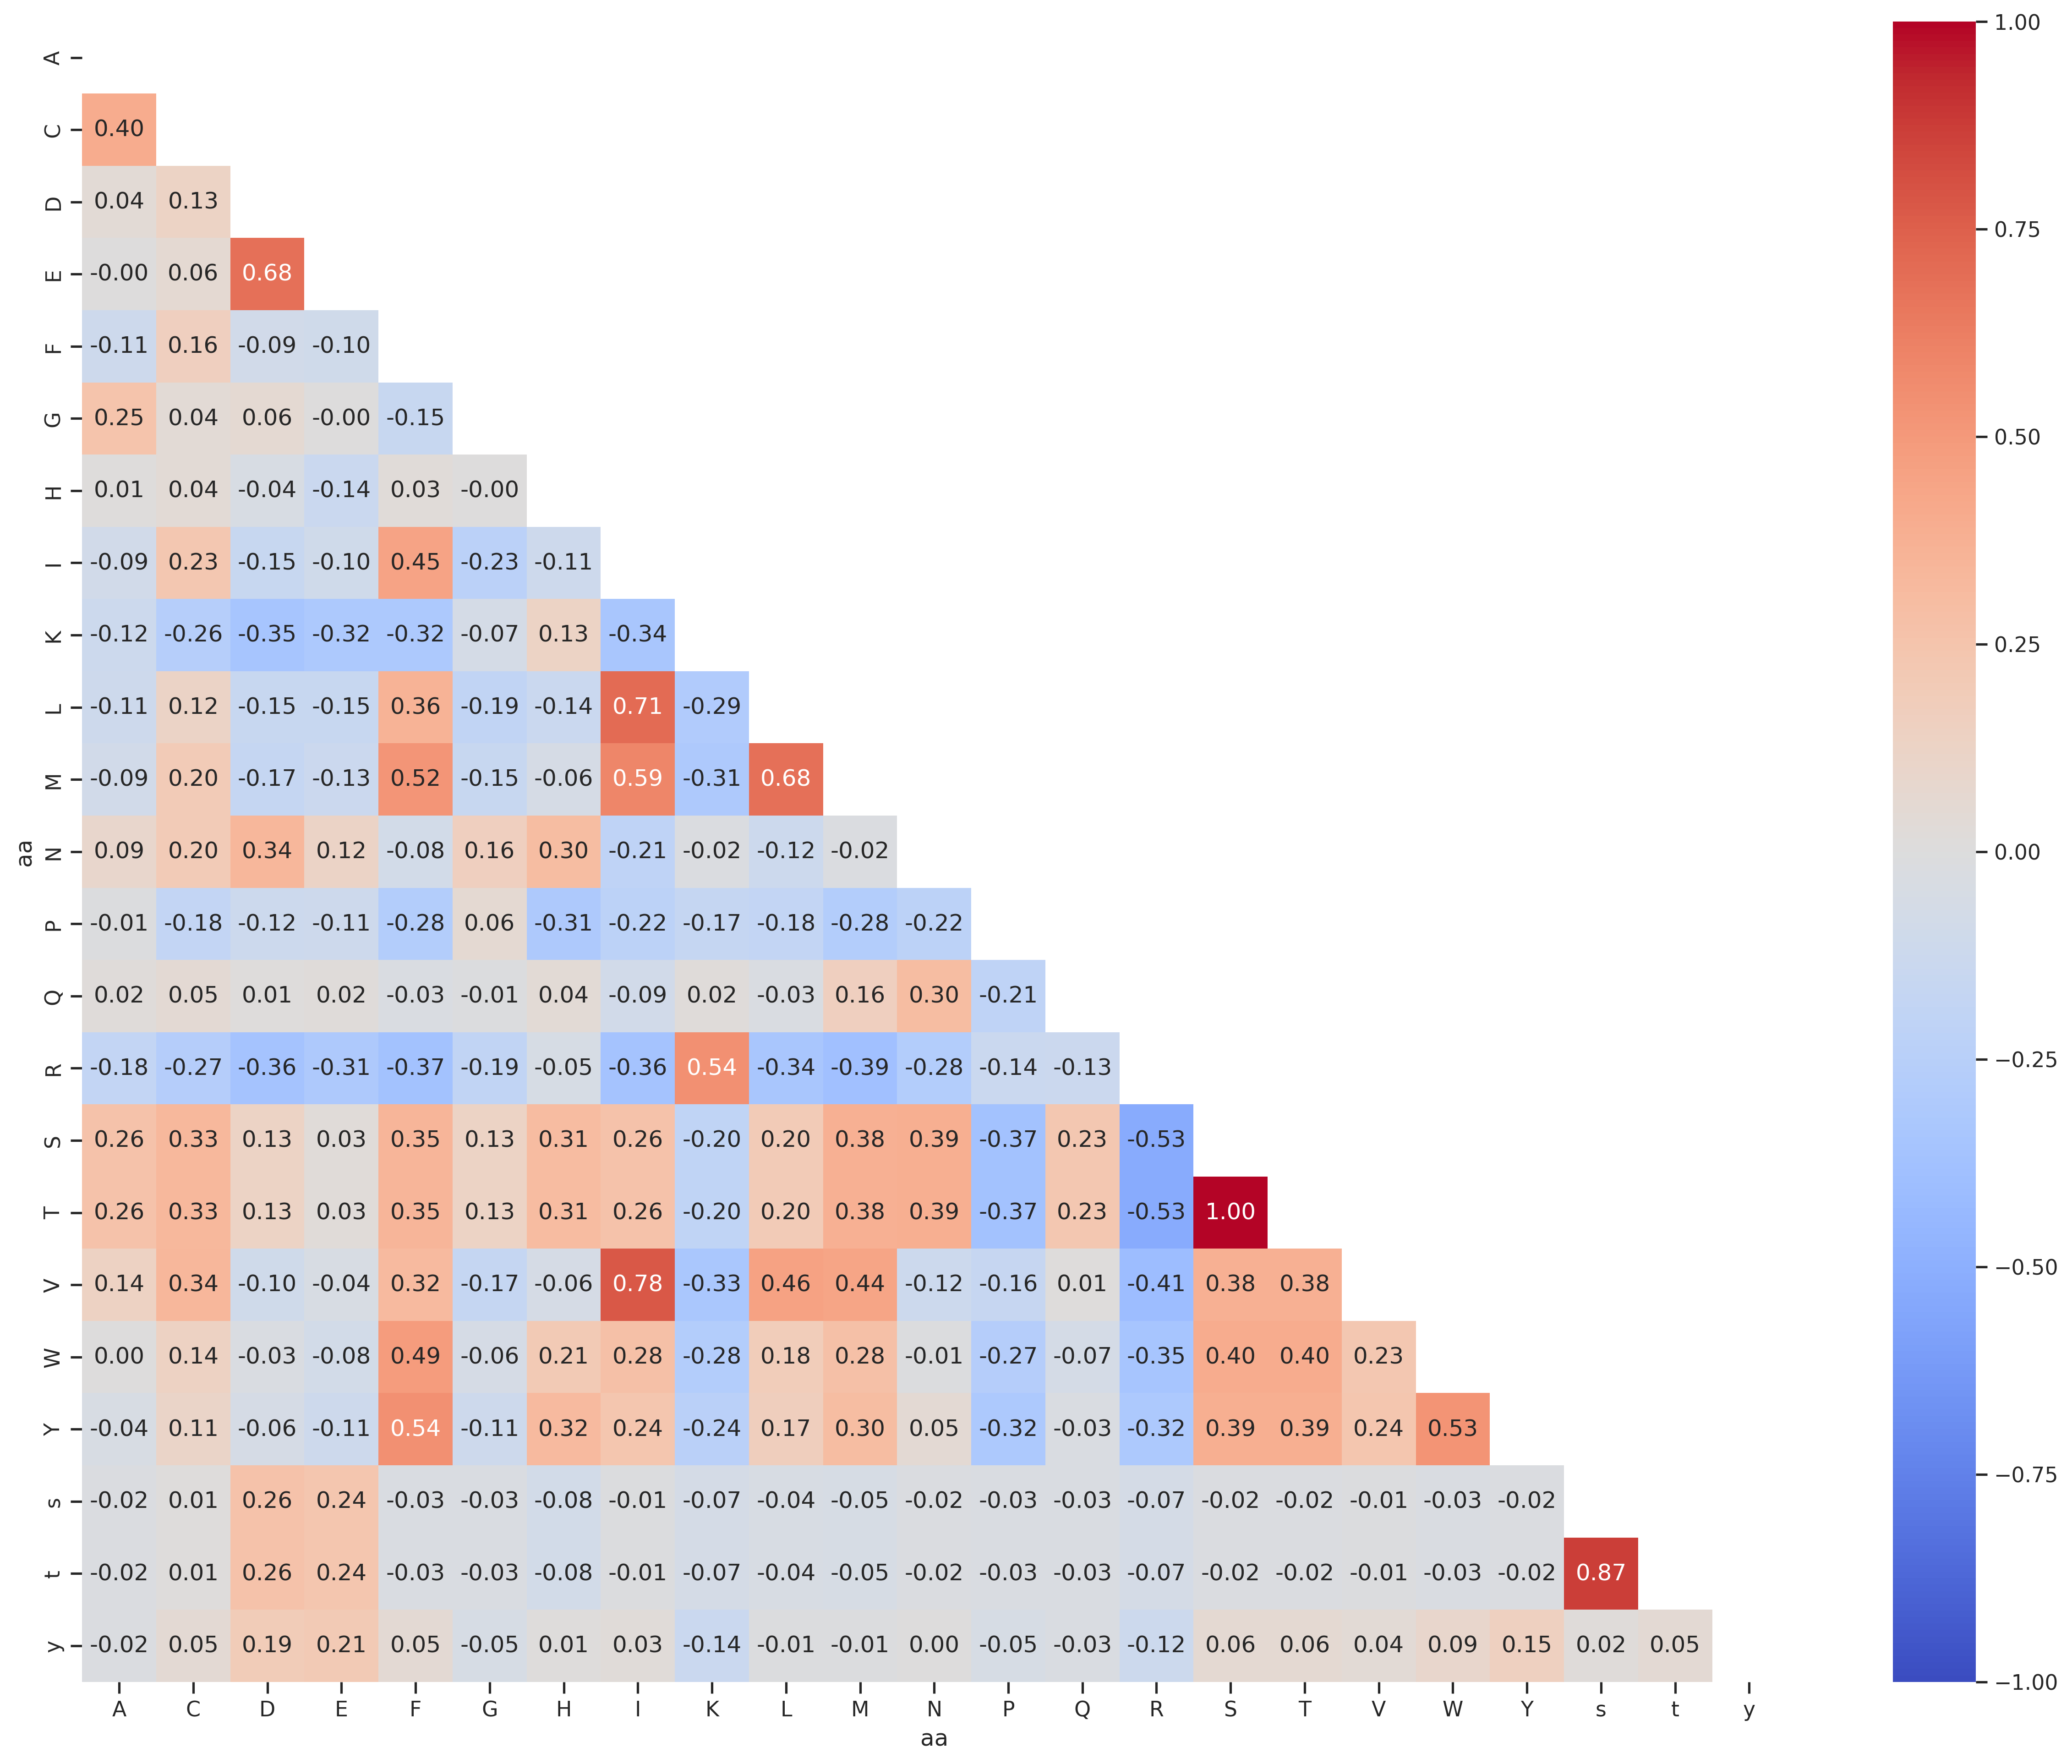

In [ ]:
df = Data.get_pspa_st_norm().iloc[:,:-3]

df2 = df.unstack().reset_index()

df2.columns = ['substrate','kinase','target']

df2['aa']=df2.substrate.str[-1]

df2['enum'] = df2.groupby('aa').cumcount()

df_pivot = df2.pivot(index='enum', columns='aa', values='target')

corr = df_pivot.corr().round(2)

draw_corr(corr)

### CDDM

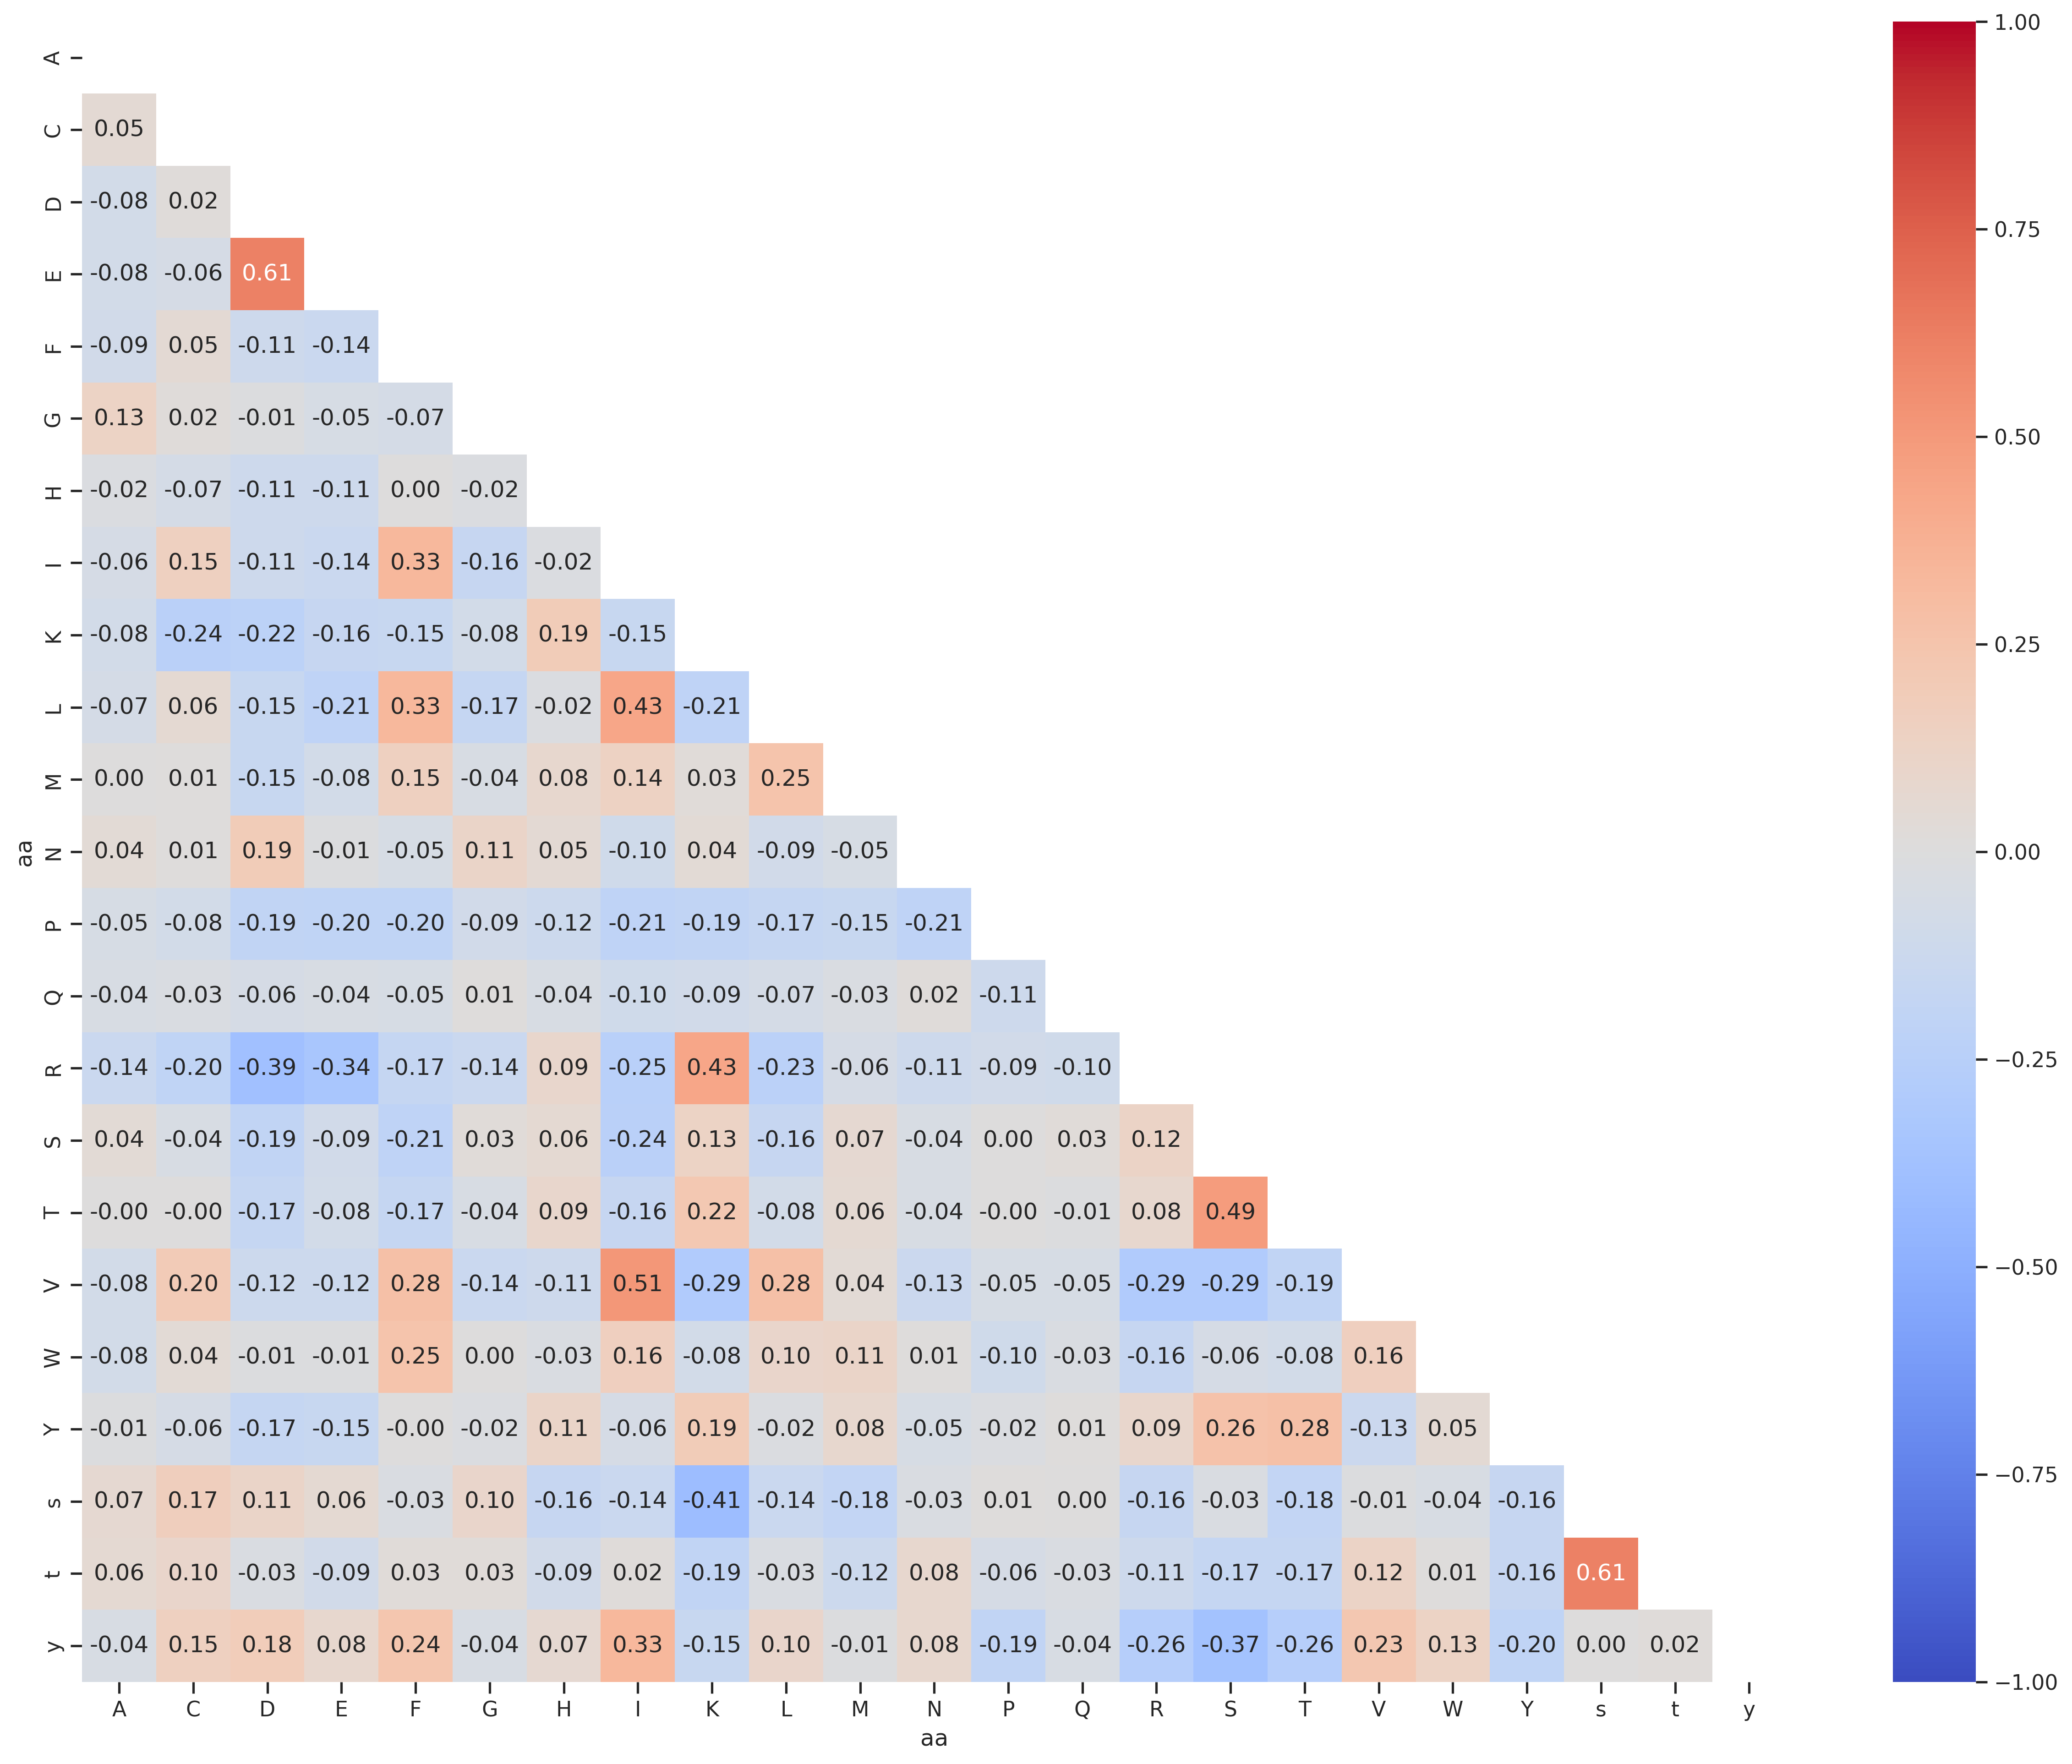

In [ ]:
df = Data.get_cddm().iloc[:,:-3]

df2 = df.unstack().reset_index()

df2.columns = ['substrate','kinase','target']

df2['aa']=df2.substrate.str[-1]

df2['enum'] = df2.groupby('aa').cumcount()

df_pivot = df2.pivot(index='enum', columns='aa', values='target')

corr = df_pivot.corr().round(2)

draw_corr(corr)